In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Reading dataset

In [ ]:
data = pd.read_csv("Housing.csv")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1754318687330.6638


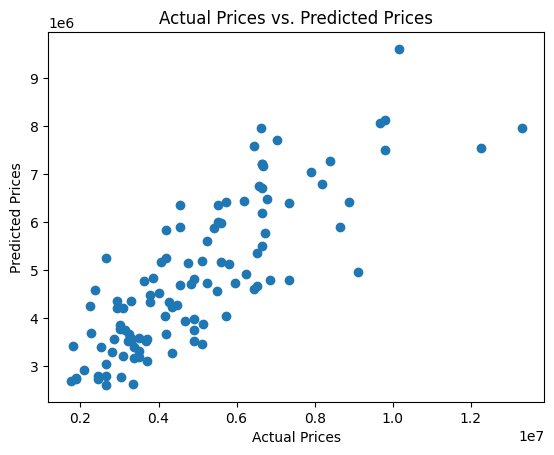

In [ ]:
# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [ ]:
# Example usage: predict the price for a new house
new_house_features = pd.DataFrame({
    'area': [7420],
    'bedrooms': [4],
    'bathrooms': [2],
    'stories': [3],
    'mainroad': ['yes'],  # Assuming 'yes' for the rest of the categorical features
    'guestroom': ['yes'],
    'basement': ['no'],
    'hotwaterheating': ['no'],
    'airconditioning': ['yes'],
    'parking': [2],
    'prefarea': ['yes'],
    'furnishingstatus': ['furnished']
})

# One-Hot Encode categorical variables for new house features
new_house_features_encoded = pd.get_dummies(new_house_features, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Ensure all necessary columns are present for prediction
missing_columns = set(X_train.columns) - set(new_house_features_encoded.columns)
for col in missing_columns:
    new_house_features_encoded[col] = 0  # Add missing columns with value 0

# Reorder columns to match the order during training
new_house_features_encoded = new_house_features_encoded[X_train.columns]

In [ ]:
# Make predictions for the new house
predicted_price = model.predict(new_house_features_encoded)
print(f'Predicted Price for the new house: {predicted_price[0]}')

Predicted Price for the new house: 6179038.87755126
